<a href="https://colab.research.google.com/github/IanTirok/Moringa-School-Core/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_06_Ian_Tirok_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Defining the question**

##1a. Specifying the data analytic question


To figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

The condition that an individual has a bank account is dependent on the type of location, Marital status, cell phone, Level of Education, Type of Job, Respondent Age, and gender of the respondent.

##1b. Defining the metric for success

At the end of this study, we shall be able to identify:
1. State of financial inclussion in the region
2. Demographic information affecting financial inclusion i.e: Location, Marital status, cellphone access, level of education, types of job, respondent age and gender


##1c. Understanding the context

The data was collected between the period 2016 - 2018. It is noted that financial inclusion is exceptionally low. we want to understand why this is the case.

##1d. Recording the Experimental Design

##1e. Data Relevance

The data is not current and may not be an actual representation of the on ground information. Also the data may not be clean enough to come up with an accurate conclusion

#**2. Importing Libraries**

In [ ]:
# import pandas

import pandas as pd

# import numpy

import numpy as np

# import datetime

import datetime

# import matplotlib

import matplotlib as plt

# import seaborn

import seaborn as sns

# import matplotlib

import matplotlib.pyplot as plt
%matplotlib notebook

# import pandas profiling

import pandas_profiling

# immport scipy

import scipy.stats as stats

#**3. Loading Datasets**

In [ ]:
#Load Financial Dataset 
url = ('/content/drive/MyDrive/WEEK 2 CORE IP/Financial Dataset - 1.csv')
fd1 = pd.read_csv(url)

In [ ]:
# Load column name definitions
url = ('/content/drive/MyDrive/WEEK 2 CORE IP/VariableDefinitions.csv')
vdef = pd.read_csv(url)

#**4. Preview Datasets**

##4a. Vdef - Variable Definitions

In [ ]:
vdef.head(30)

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


##4b. FD1 - FINANCIAL DATASET 1

In [ ]:
fd1.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
fd1.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
fd1.sample(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
12231,Rwanda,2016,uniqueid_6164,No,Rural,Yes,5.0,40.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
20966,Tanzania,2017,uniqueid_6164,No,Urban,Yes,1.0,56.0,Female,Head of Household,Widowed,Primary education,Self employed
13431,Rwanda,2016,uniqueid_7364,No,Rural,Yes,6.0,19.0,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
10998,Rwanda,2016,uniqueid_4931,No,Urban,Yes,5.0,28.0,Female,Other non-relatives,Single/Never Married,Primary education,Informally employed
11887,Rwanda,2016,uniqueid_5820,No,Rural,Yes,5.0,42.0,Female,Head of Household,Divorced/Seperated,Primary education,Informally employed
20198,Tanzania,2017,uniqueid_5396,No,Rural,Yes,1.0,28.0,Male,Head of Household,Single/Never Married,Secondary education,Self employed
7416,Rwanda,2016,uniqueid_1349,Yes,Rural,Yes,8.0,40.0,Female,Spouse,Married/Living together,Secondary education,Farming and Fishing
5946,Kenya,2018,uniqueid_5947,No,Rural,Yes,7.0,39.0,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
13917,Rwanda,2016,uniqueid_7850,No,Rural,No,1.0,78.0,Female,Head of Household,Widowed,No formal education,Dont Know/Refuse to answer
10478,Rwanda,2016,uniqueid_4411,No,Rural,Yes,1.0,72.0,Female,Head of Household,Widowed,Primary education,Farming and Fishing


#**5. Learning more about the Data**

In [ ]:
fd1.shape

(23524, 13)

In [ ]:
fd1.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
fd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
fd1.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


#**6. Cleaning the Data**

##6a. Standardizing Collumn names

In [ ]:
fd1.columns = fd1.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

##6b. Identifying outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


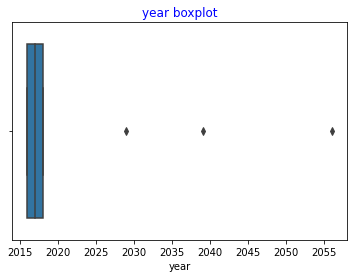

In [ ]:
# checking for outliers on variable household_size

plt.title("year boxplot" , color = 'blue')
sns.boxplot(fd1['year'])
plt.show()
# the boxplot shows presence of outliers

In reference to the above box plot, this study was conducted between 2016 and 2018, any value above 2018 is an outlier. hence we shall drop it

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


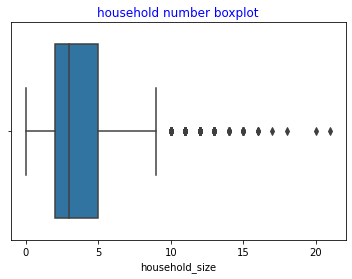

In [ ]:
# checking for outliers on variable household_size
plt.title("household number boxplot" , color = 'blue')
sns.boxplot(fd1['household_size'])
plt.show()
# the boxplot shows presence of outliers


In reference to the above box plot and the maximum: "Q3 +1.5*IQR" formula, values above 9 are outliers. Hence we shall drop them

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


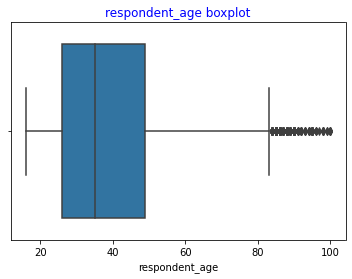

In [ ]:
# checking for outliers on variable respondent age

plt.title("respondent_age boxplot" , color = 'blue')
sns.boxplot(fd1['respondent_age'])
plt.show()
# the boxplot shows presence of outliers


In reference to the above box plot and the maximum: "Q3 +1.5*IQR" formula, values above 82 are outliers. Hence we shall drop them

##6c. Dropping Outliers

In [ ]:
Q1= fd1.quantile(0.25)
Q3 = fd1.quantile(0.75)
IQR = Q3-Q1
IQR
fd1 = fd1[~((fd1 < (Q1 - 1.5 * IQR)) |(fd1 > (Q3 + 1.5 * IQR))).any(axis=1)]
fd1.shape

# Printing the shape of the new dataset

fd1.shape

(22903, 13)

##6d. Dropping Null Values

In [ ]:
fd1 = fd1.dropna()
fd1.shape

(22725, 13)

##6e. Dropping Duplicate Values

In [ ]:
fd1.drop_duplicates()
fd1.shape

(22725, 13)

##6f. Dropping Unncecessary columns

In [ ]:
fd1.drop(['uniqueid', 'the_relathip_with_head'], axis = 1, inplace = True) 
fd1

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,No,Rural,No,2.0,57.0,Female,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,No,Rural,Yes,4.0,48.0,Female,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,No,Rural,Yes,2.0,27.0,Female,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,No,Rural,Yes,5.0,27.0,Female,Widowed,Primary education,Other Income


In [ ]:
fd1.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'marital_status', 'level_of_educuation',
       'type_of_job'],
      dtype='object')

#**7. Exploratory Analysis**

####Mode

In [ ]:
fd1.country.mode()

0    Rwanda
dtype: object

In [ ]:
fd1.year.mode()

0    2016
dtype: int64

In [ ]:
fd1.has_a_bank_account.mode()

0    No
dtype: object

In [ ]:
fd1.type_of_location.mode()

0    Rural
dtype: object

In [ ]:
fd1.cell_phone_access.mode()

0    Yes
dtype: object

In [ ]:
fd1.household_size.mode()	

0    2.0
dtype: float64

In [ ]:
fd1.respondent_age.mode()	

0    30.0
dtype: float64

In [ ]:
fd1.gender_of_respondent.mode()


0    Female
dtype: object

In [ ]:
fd1.marital_status.mode()

0    Married/Living together
dtype: object

In [ ]:
fd1.level_of_educuation.mode()

0    Primary education
dtype: object

In [ ]:
fd1.type_of_job.mode()

0    Self employed
dtype: object

In [ ]:
modedf =pd.DataFrame()
modedf

data = {'Criteria': ['country',
 'year',
 'has_a_bank_account',
 'type_of_location',
 'cell_phone_access',
 'household_size',
 'respondent_age',
 'gender_of_respondent',
 'the_relathip_with_head',
 'marital_status',
 'level_of_educuation',
 'type_of_job'], 'Majority of the respondents': ['Come from Rwanda', 'Responded in 2016', 'Dont have bank accounts', 'Come from Rural areas', 'Have Celphone Access', 'Come from 2 people households', '30 years old', 'Are Female', 'Are the head of House hold', 'Are Married or living together', 'Have primary level education','Are self employed']} 
modedf =pd.DataFrame(data)
modedf

,Criteria,Majority of the respondents
0,country,Come from Rwanda
1,year,Responded in 2016
2,has_a_bank_account,Dont have bank accounts
3,type_of_location,Come from Rural areas
4,cell_phone_access,Have Celphone Access
5,household_size,Come from 2 people households
6,respondent_age,30 years old
7,gender_of_respondent,Are Female
8,the_relathip_with_head,Are the head of House hold
9,marital_status,Are Married or living together


####Mean

In [ ]:
fd1.household_size.mean()

3.57984598459846

The average number of people in a household is 3

In [ ]:
fd1.respondent_age.mean()

38.34798679867987

The average age of respondents is 38

####Skew

In [ ]:
fd1.skew()

year              0.060351
household_size    0.605875
respondent_age    0.740214
dtype: float64

####Kurtois

In [ ]:
fd1.kurt()

year             -1.601466
household_size   -0.505578
respondent_age   -0.237494
dtype: float64

####Variance

In [ ]:
fd1.var()

year                0.716335
household_size      4.328656
respondent_age    249.834101
dtype: float64

####Range

######Year

In [ ]:
x = (fd1.year.max()) 
y = (fd1.year.min())

z = x-y
print('the range of years that the study was conducted is:',  z)

the range of years that the study was conducted is: 2


#####Household size

In [ ]:
x = (fd1.household_size.max()) 
y = (fd1.household_size.min())

z = x-y
print('the range of household size in the dataset is:',  z)

the range of household size in the dataset is: 9.0


#####Respondent age

In [ ]:
x = (fd1.respondent_age.max()) 
y = (fd1.respondent_age.min())

z = x-y
print('the range of respondent age in the dataset is:',  z)

the range of respondent age in the dataset is: 67.0


####Describe

In [ ]:
fd1.household_size.describe()

count    22725.000000
mean         3.579846
std          2.080542
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          9.000000
Name: household_size, dtype: float64

In [ ]:
fd1.respondent_age.describe()

count    22725.000000
mean        38.347987
std         15.806141
min         16.000000
25%         26.000000
50%         35.000000
75%         48.000000
max         83.000000
Name: respondent_age, dtype: float64

###**7a. Univariate exploratory Analysis**


###Univariate Charts

In [ ]:
fd1.columns


Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'marital_status', 'level_of_educuation',
       'type_of_job'],
      dtype='object')

####Countries


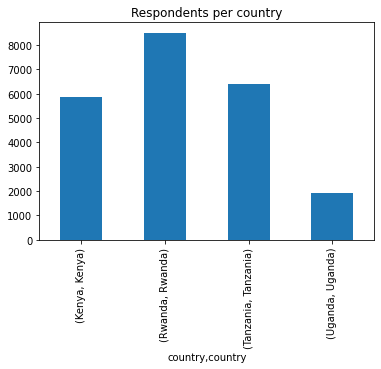

In [ ]:
country = fd1.groupby(['country']).country.value_counts()
#country.value_counts()

country.plot.bar(title = 'Respondents per country')




Most of the respondents are Rwandan followed by Tanzania then Kenya. Least respondents are from Uganda.

####Year

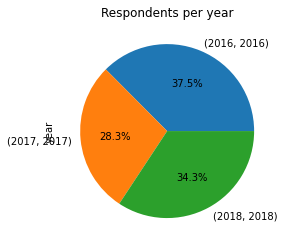

In [ ]:
year = fd1.groupby(['year']).year.value_counts()

year.plot.pie(title = 'Respondents per year',autopct='%1.1f%%')

Most respondents participated in 2016. Closely followed by 2018 and least in 2017

#### What percentage has bank accounts

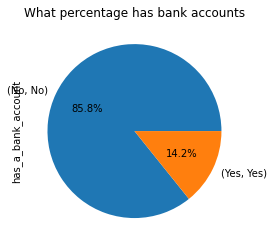

In [ ]:
has_a_bank_account = fd1.groupby(['has_a_bank_account']).has_a_bank_account.value_counts()

has_a_bank_account.plot.pie(title = 'What percentage has bank accounts',autopct='%1.1f%%')

Majority of the participants do not have bank accounts

####Rural vs Urban Population

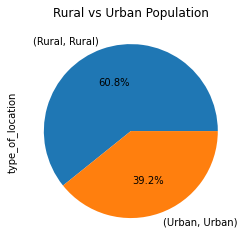

In [ ]:
type_of_location = fd1.groupby(['type_of_location']).type_of_location.value_counts()

type_of_location.plot.pie(title = 'Rural vs Urban Population',autopct='%1.1f%%')

Majority of the participants are from rural areas

####Percentage of population with cellphone access

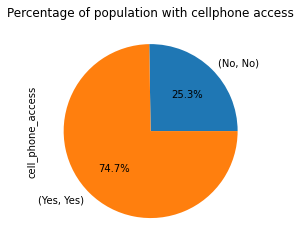

In [ ]:
cell_phone_access = fd1.groupby(['cell_phone_access']).cell_phone_access.value_counts()

cell_phone_access.plot.pie(title = 'Percentage of population with cellphone access',autopct='%1.1f%%')

Majority of the population do have cellphone access

#### Household size

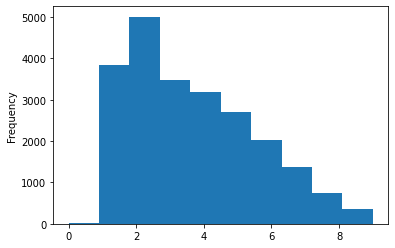

In [ ]:
fd1['household_size'].plot(kind="hist")

####Respondents age

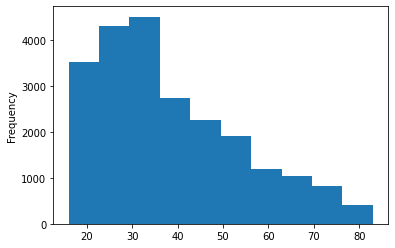

In [ ]:
fd1['respondent_age'].plot(kind="hist")

####Perecentage of gender of respondents

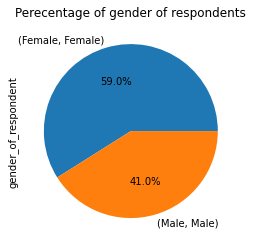

In [ ]:
gender_of_respondent = fd1.groupby(['gender_of_respondent']).gender_of_respondent.value_counts()

gender_of_respondent.plot.pie(title = 'Perecentage of gender of respondents',autopct='%1.1f%%')

Majority of the respondents are female

####Role in the household

Majority of the respondents were the head of their households

#### Marital Status

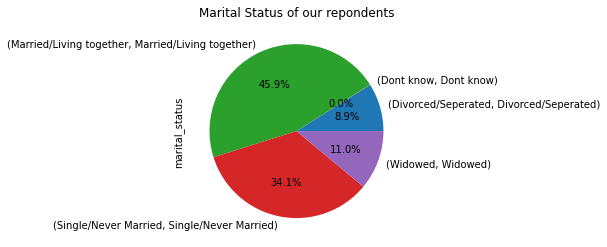

In [ ]:

marital_status = fd1.groupby(['marital_status']).marital_status.value_counts()
marital_status.plot.pie(title = 'Marital Status of our repondents',autopct='%1.1f%%')


Majority of our respondents are married

####Level of education of our respondents

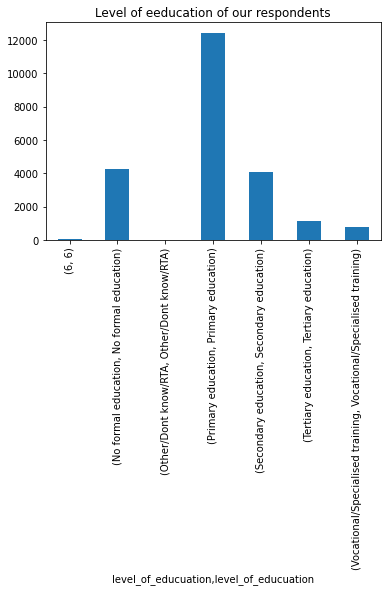

In [ ]:
level_of_educuation = fd1.groupby(['level_of_educuation']).level_of_educuation.value_counts()
level_of_educuation.plot.bar(title = 'Level of eeducation of our respondents')

Majority of our population only have primary education

####type_of_jobs of our population

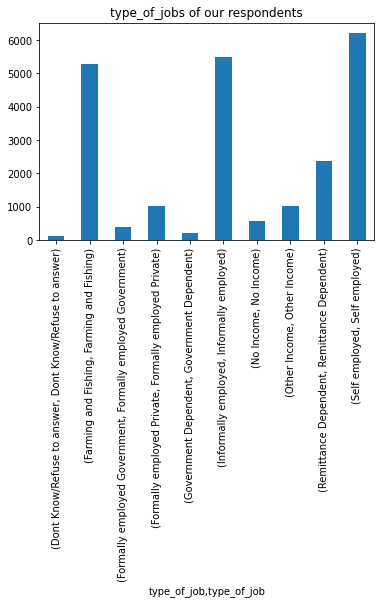

In [ ]:

type_of_job = fd1.groupby(['type_of_job']).type_of_job.value_counts()
type_of_job.plot.bar(title = 'type_of_jobs of our respondents')


Ranking of employment is: 
1. Self employment
2. Informally employed
3. Farming and fishing

###**7b. Bivariate exploratory Analysis**

###Bivariate Charts

####Access to banking facilities

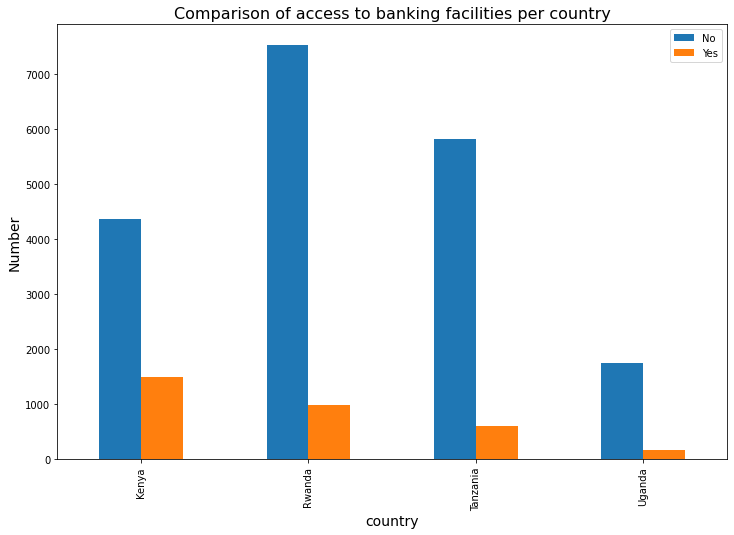

In [ ]:
fd1.groupby(['country','has_a_bank_account']).count()
fd1.groupby(['country','has_a_bank_account']).year.count()

#Plotting our bar graph 
fd1.groupby(['country','has_a_bank_account']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Comparison of access to banking facilities per country',fontsize=16)
plt.xlabel('country',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

As seen in the graphical representation above, Kenya has the highest banked population that participated in the survey. Uganda is the least banked. However this may not be an accurate representation because there are more respondents from Rwanda than other regions

####Distribution of respondents location per country

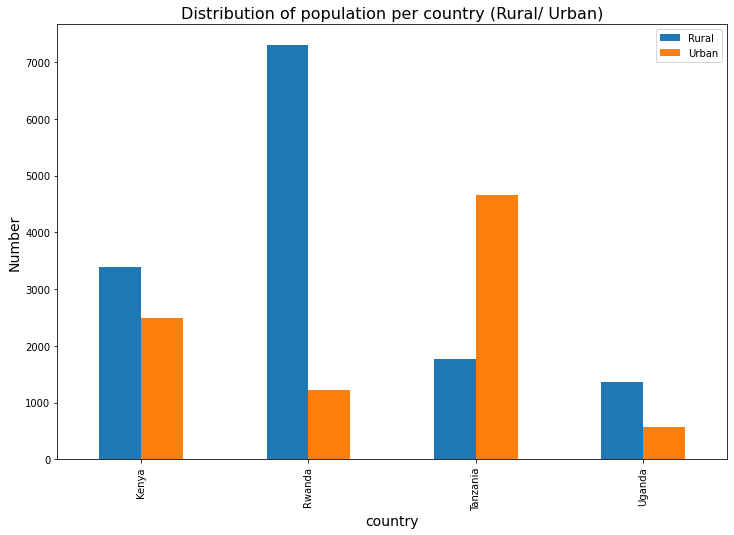

In [ ]:
fd1.groupby(['country','type_of_location']).count()
fd1.groupby(['country','type_of_location']).year.count()

#Plotting our bar graph 
fd1.groupby(['country','type_of_location']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Distribution of population per country (Rural/ Urban)',fontsize=16)
plt.xlabel('country',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

Tanzania has the largest population from urban location that participated in the survey. It is likely that the survey was conducted in one of the capital cities. We must acknowledge thet this may cause for the data to be skewed in more access to banking in tannzania as compared to other regions.

The rest of the countries have most of the population in rural areas. This is an accurate representation. According to real world data, The region has alot of arable lands and is are developing countries. so you expect that most of the population will be in rural areas

####Cellphone Access per country

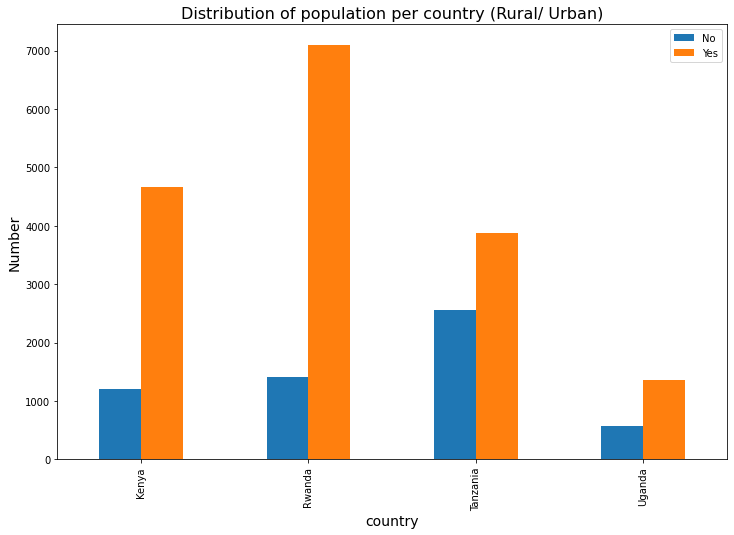

In [ ]:
fd1.groupby(['country','cell_phone_access']).count()
fd1.groupby(['country','cell_phone_access']).year.count()

#Plotting our bar graph 
fd1.groupby(['country','cell_phone_access']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Distribution of population per country (Rural/ Urban)',fontsize=16)
plt.xlabel('country',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

This is an interesting graphical representation of access to mobile phones in the region. Clearly, mobile phone penetration is high in the region. This could be an opportunity for the banks to tap this market through disruptive fintech banking e.g m-pesa

####level_of_educuation comparison by country

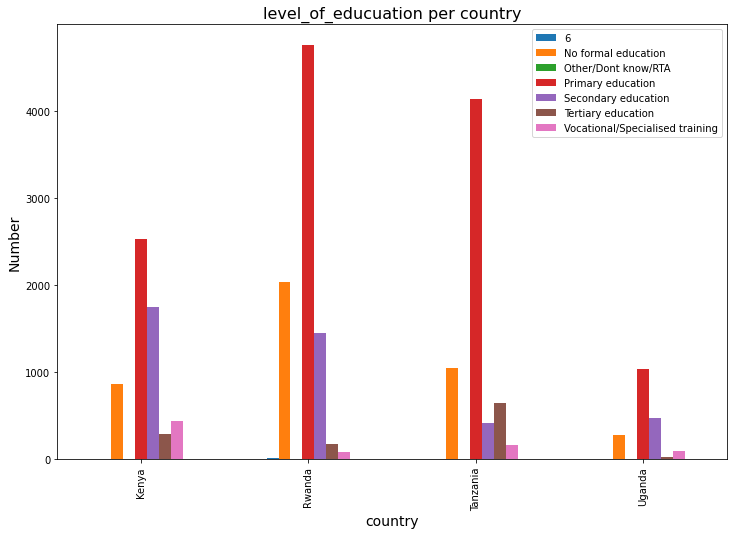

In [ ]:
fd1.groupby(['country','level_of_educuation']).count()
fd1.groupby(['country','level_of_educuation']).year.count()

#Plotting our bar graph 
fd1.groupby(['country','level_of_educuation']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('level_of_educuation per country',fontsize=16)
plt.xlabel('country',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

In all of the countries, majority of the population has atleast primary education. Very few people have vocational and tertiary education.
Uganda has the least people with tertiary education. Tanzania has the most people with tertiary education. given that majority of the Tanzania dataset is urban, we could expect more tertiary educated people in Tanzania

####type_of_job by countries

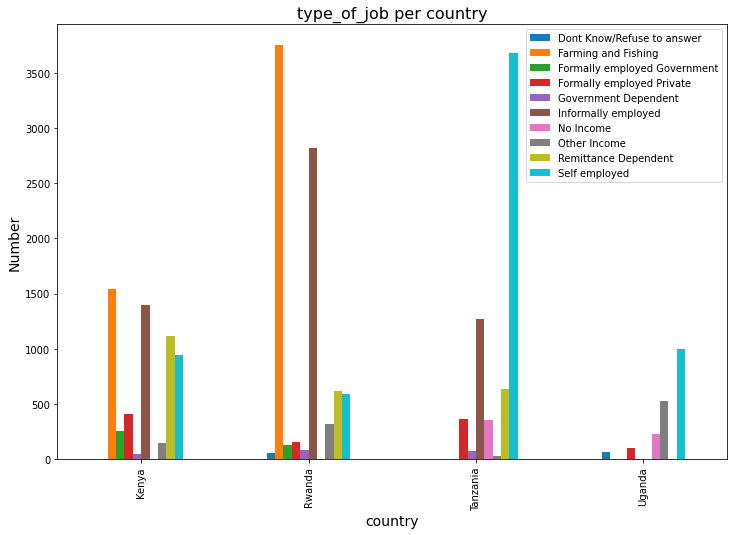

In [ ]:
fd1.groupby(['country','type_of_job']).count()
fd1.groupby(['country','type_of_job']).year.count()

#Plotting our bar graph 
fd1.groupby(['country','type_of_job']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('type_of_job per country',fontsize=16)
plt.xlabel('country',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)

Given the large arable lands in the region, we could expect that most of the population to work in the farming industry. However in Tanzania and Uganda, most of the population is self employed. We could attribute this with the location of the respondent - either urban or rural

####Bank Account relation to gender

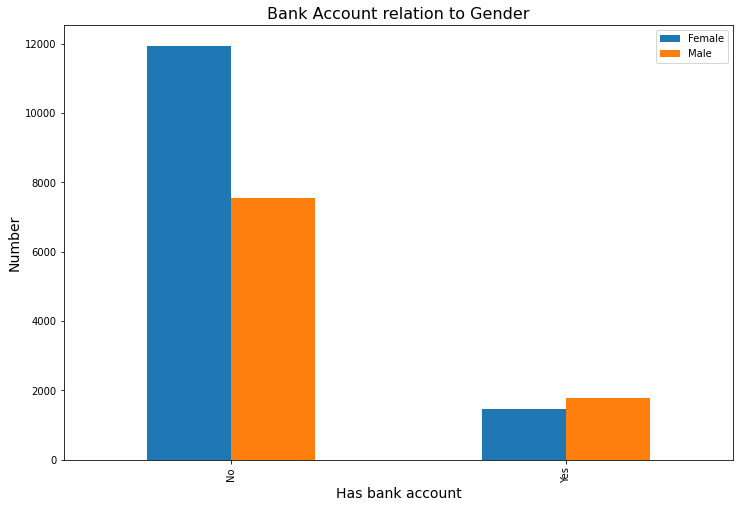

In [ ]:
fd1.groupby(['has_a_bank_account','gender_of_respondent']).count()
fd1.groupby(['has_a_bank_account','gender_of_respondent']).year.count()

#Plotting our bar graph 
fd1.groupby(['has_a_bank_account','gender_of_respondent']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Bank Account relation to Gender',fontsize=16)
plt.xlabel('Has bank account',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)


Out of the population that is banked, more men than women are banked. Out of the population that is not banked, more women than men are not banked. Generally, more men than women are banked

####Bank Account corelation to level of education

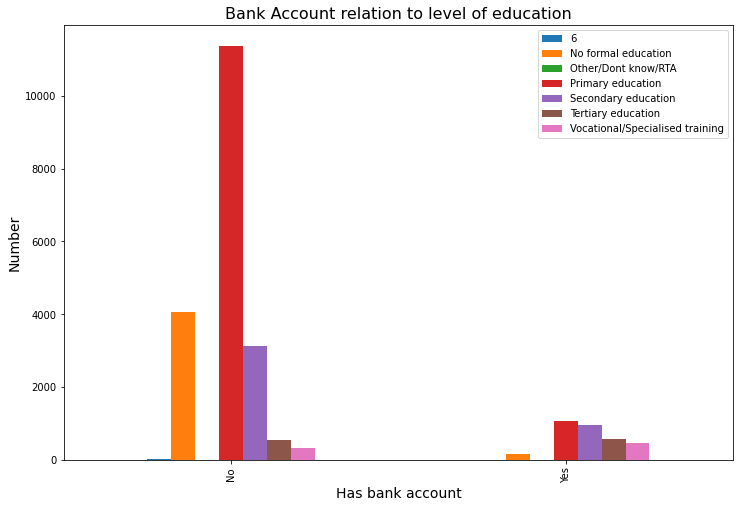

In [ ]:

#fd1.groupby(['has_a_bank_account','level_of_educuation']).count()
#fd1.groupby(['has_a_bank_account','level_of_educuation']).year.count()

#Plotting our bar graph 
fd1.groupby(['has_a_bank_account','level_of_educuation']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Bank Account relation to level of education',fontsize=16)
plt.xlabel('Has bank account',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=10)




Majority of the population is not banked. As you can see above, the data does not tell us if there is any correlation. The columns of banked population seems to be a shrinked version of the none banked population




####Access to banking relation to marital status

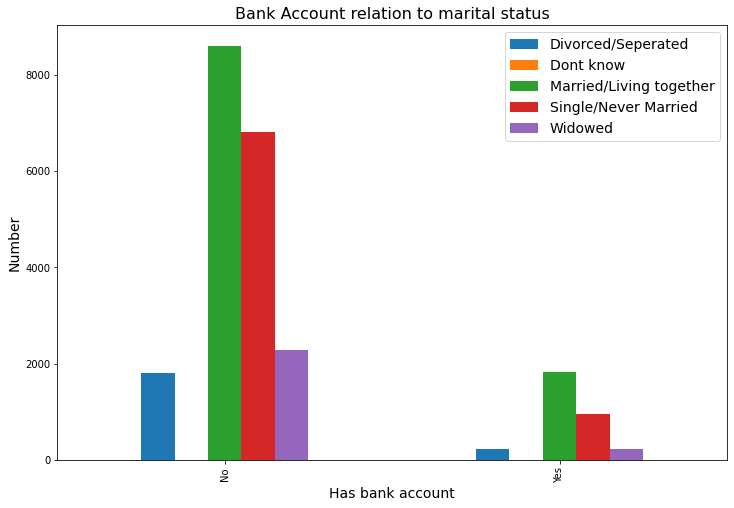

In [ ]:
#Plotting our bar graph 
fd1.groupby(['has_a_bank_account','marital_status']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Bank Account relation to marital status',fontsize=16)
plt.xlabel('Has bank account',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)


Out of the banked population, the married population is most banked. However most of the married people do not have bank accounts. Least of the widdowed and divorced population is not banked

####Access to bank accounts vs type_of_job

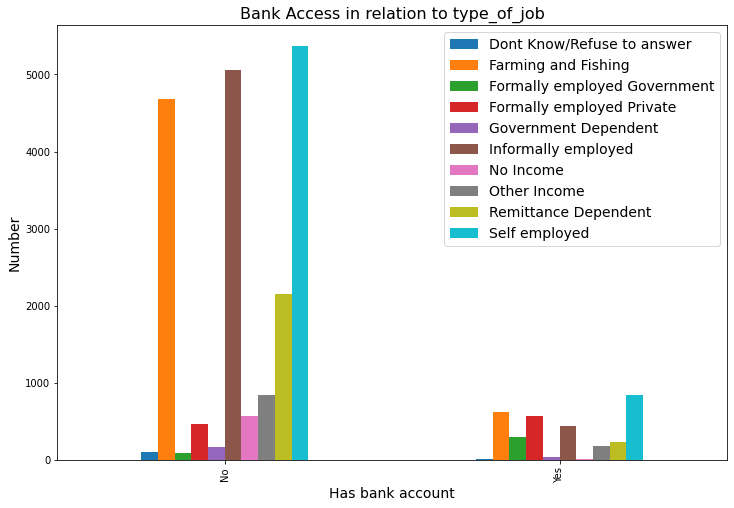

In [ ]:
#Plotting our bar graph 
fd1.groupby(['has_a_bank_account','type_of_job']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Bank Access in relation to type_of_job',fontsize=16)
plt.xlabel('Has bank account',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)


This chart shows most of the self employed individuals are not banked. however majority of the formally emloyed in the private sector are banked. which is expected. Bankers shoulf focus on getting the self employed, farmers and and informally employed to bank in order to achieve more inclusion in the region


####Access to banking facilities in relation to Location of respondents

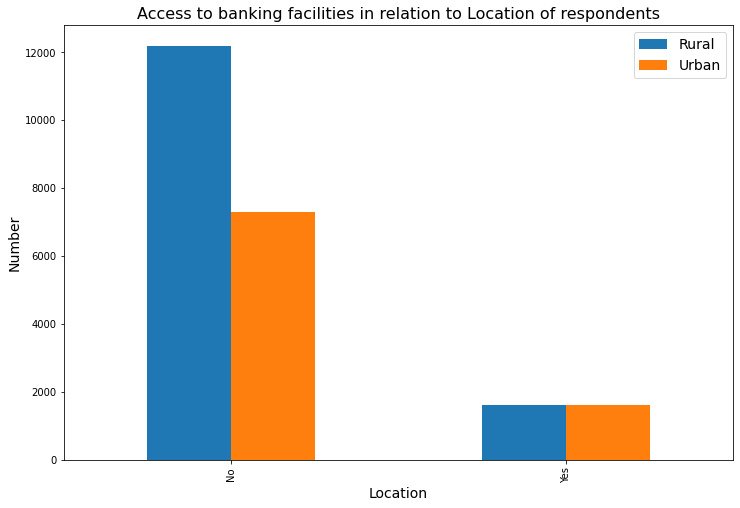

In [ ]:
#Plotting our bar graph 
fd1.groupby(['has_a_bank_account','type_of_location']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Access to banking facilities in relation to Location of respondents',fontsize=16)
plt.xlabel('Location',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)


This chart shows that access to banking facilities is equal in both urban and rural areas. Given the previous charts, it makes sense that the focus should be to make banking more inclusive for the rural residents in order to achieve more inclusion


####Location of residents in relation to level of education


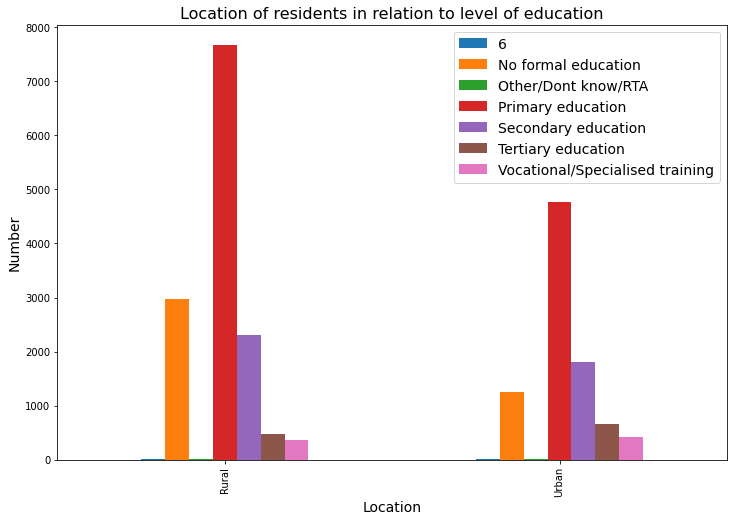

In [ ]:
#Plotting our bar graph 
fd1.groupby(['type_of_location','level_of_educuation']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Location of residents in relation to level of education',fontsize=16)
plt.xlabel('Location',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)


Access to education seems to be equal in both urban and rural areas. The descripancy in the graph is because of a greater population being from rural areas

####Location of respondents in relation to type_of_jobs

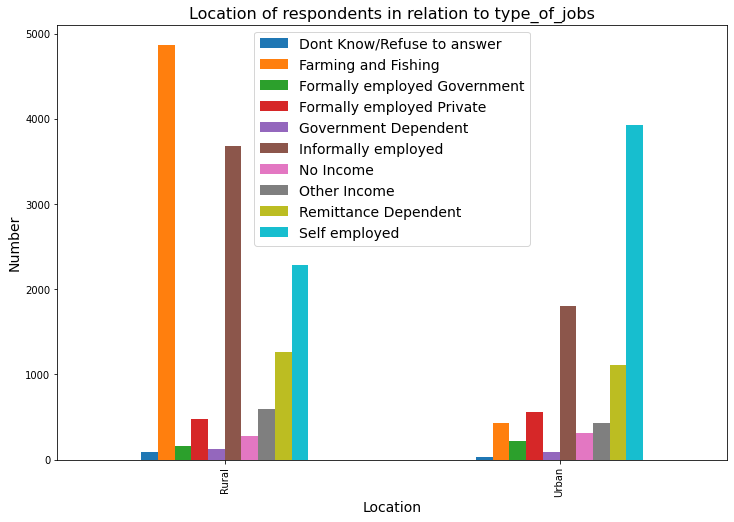

In [ ]:
#Plotting our bar graph 
fd1.groupby(['type_of_location','type_of_job']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Location of respondents in relation to type_of_jobs',fontsize=16)
plt.xlabel('Location',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

Other than farming - larger arable lands in rural areas, The distribution of employment/ careers seem to be replicated in both urban and rural areas

####Type of job in relation to respondents age

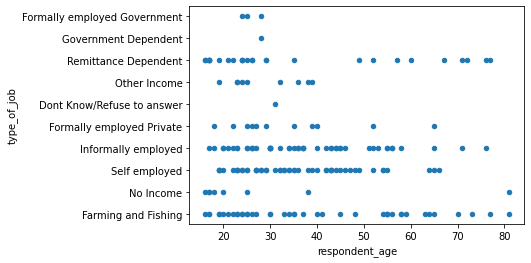

In [ ]:
fd1[fd1['year'] < 2020].sample(200).plot.scatter(y='type_of_job', x='respondent_age')

Majority of the younger population is employed in farming, fishing, informal sector or is self employed

####Cellphone access correlation to access to bank account

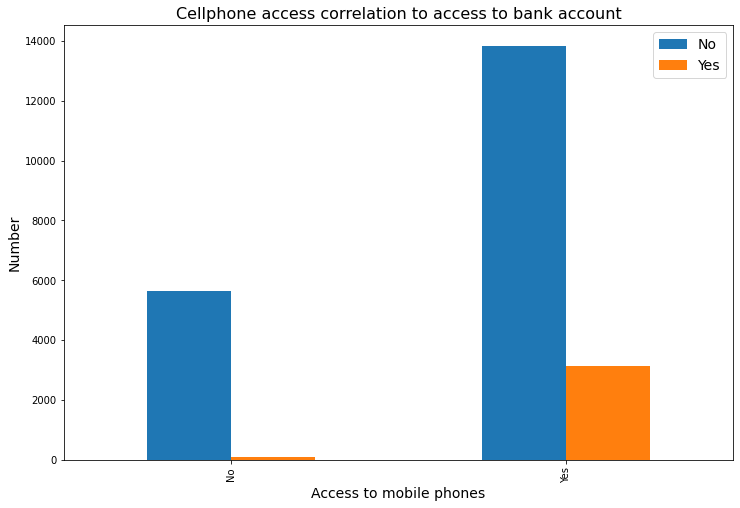

In [ ]:
#Plotting our bar graph 
fd1.groupby(['cell_phone_access','has_a_bank_account']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Cellphone access correlation to access to bank account',fontsize=16)
plt.xlabel('Access to mobile phones',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

Majority of the population have access to mobile phones. Most people with bank accounts have phones.
This is a very insightful graph. given the high penetration to access to mobile phones, disruptive technologies can be used to bank those with mobile phones( the majority) on their mobile phones

####Celphone access in relation to level of education

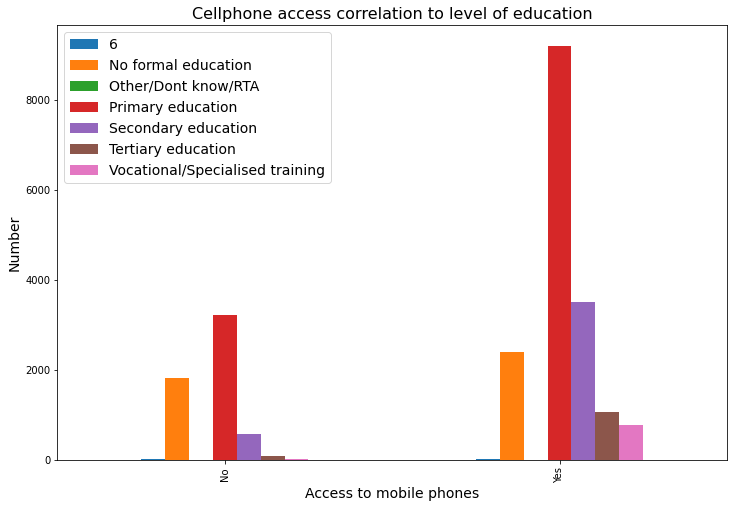

In [ ]:

#Plotting our bar graph 
fd1.groupby(['cell_phone_access','level_of_educuation']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Cellphone access correlation to level of education',fontsize=16)
plt.xlabel('Access to mobile phones',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

Most people have mobile phones despite their level of education

####Celphone access in relation to type_of_job

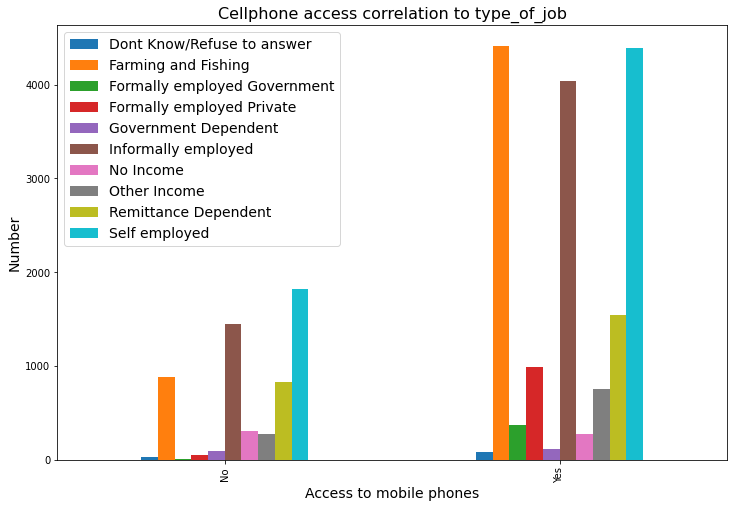

In [ ]:

#Plotting our bar graph 
fd1.groupby(['cell_phone_access','type_of_job']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Cellphone access correlation to type_of_job',fontsize=16)
plt.xlabel('Access to mobile phones',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

Most people with no source of income don't have mobile phones - which is expected. However I believe there will be an upward trend to access of mobile phones.

####Mobille phone access in relation to Location of respondents

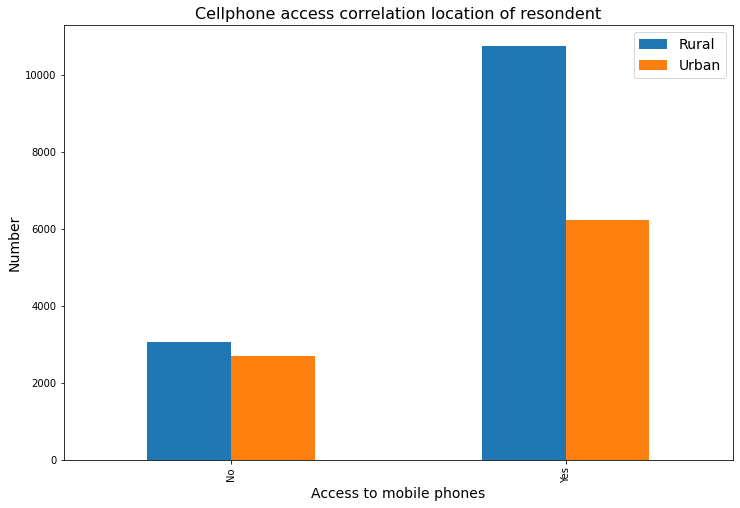

In [ ]:
#Plotting our bar graph 
fd1.groupby(['cell_phone_access','type_of_location']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Cellphone access correlation location of resondent',fontsize=16)
plt.xlabel('Access to mobile phones',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

Most people in both urban and rural areas have mobile phones

####Household size in relation to age

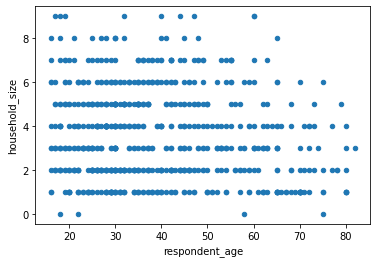

In [ ]:
fd1[fd1['year'] < 2020].sample(700).plot.scatter(y='household_size', x='respondent_age')

There are vere few people with large households.
The elderly population is also quite little as compared to the younger population

####Household size in relation to Access to banking facilities

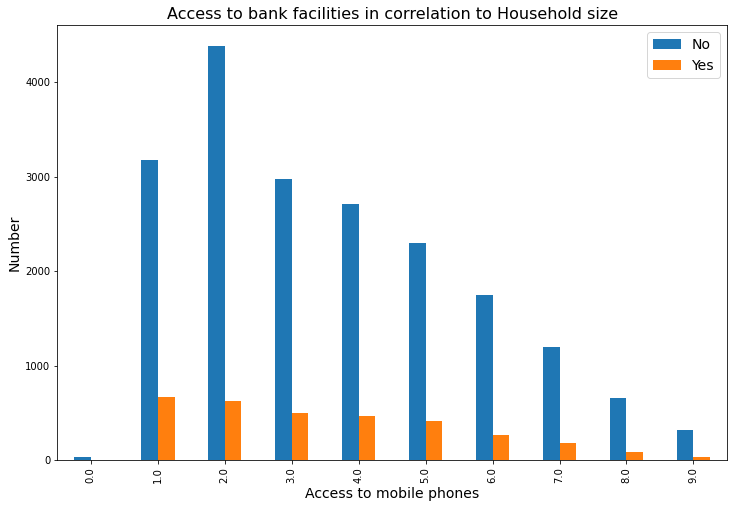

In [ ]:
#Plotting our bar graph 
fd1.groupby(['household_size','has_a_bank_account']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Access to bank facilities in correlation to Household size',fontsize=16)
plt.xlabel('Access to mobile phones',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

####Smaller households have more access to banking facilities

####Relation of gender to the level of education

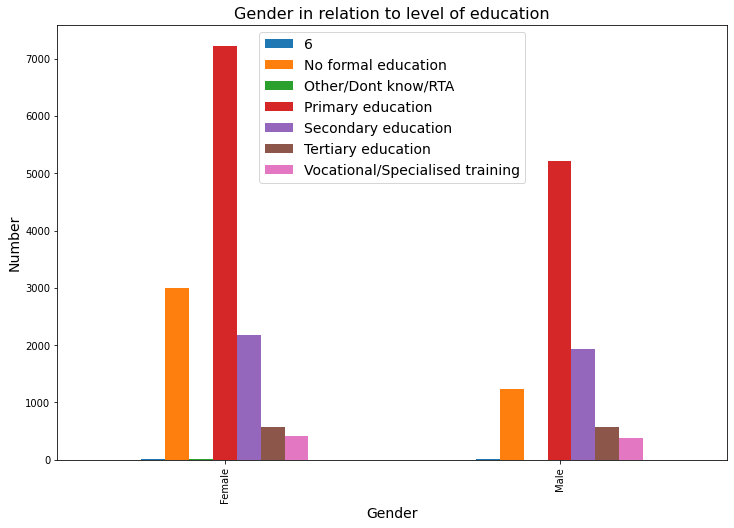

In [ ]:
#Plotting our bar graph 
fd1.groupby(['gender_of_respondent','level_of_educuation']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Gender in relation to level of education',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

Surprisingly, more females are educated than men

####Gender correlation to type_of_job

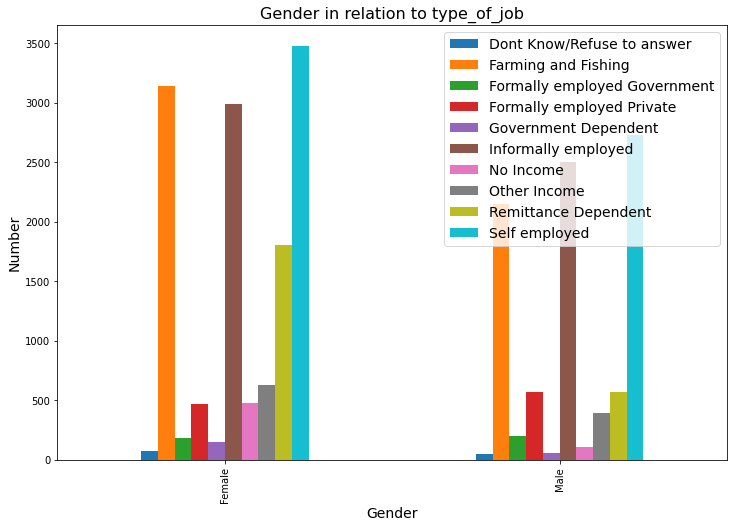

In [ ]:
#Plotting our bar graph 
fd1.groupby(['gender_of_respondent','type_of_job']).year.count().unstack().plot(kind='bar',figsize=(12,8))

# labels and title
plt.title('Gender in relation to type_of_job',fontsize=16)
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Number',fontsize=14)
plt.legend(fontsize=14)

There seems to be no co-relation between career choices between men and women

###**7c. Multivariate exploratory Analysis**

###Multivariate charts

####Chi Tests

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
fd1['country']=lb.fit_transform(fd1['country'].astype(str))
fd1['type_of_location']=lb.fit_transform(fd1['type_of_location'].astype(str))
fd1['cell_phone_access']=lb.fit_transform(fd1['cell_phone_access'].astype(str))
fd1['gender_of_respondent']=lb.fit_transform(fd1['gender_of_respondent'].astype(str))
fd1['marital_status']=lb.fit_transform(fd1['marital_status'].astype(str))
fd1['level_of_educuation']=lb.fit_transform(fd1['level_of_educuation'].astype(str))
fd1['type_of_job']=lb.fit_transform(fd1['type_of_job'].astype(str))

In [ ]:
fd1.sample(10)

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,marital_status,level_of_educuation,type_of_job
9360,1,2016,No,0,0,2.0,23.0,1,3,3,1
3248,0,2018,No,0,1,4.0,68.0,1,2,3,5
9298,1,2016,No,0,1,4.0,32.0,1,2,3,5
20764,2,2017,No,1,1,2.0,50.0,1,3,3,9
8325,1,2016,No,0,1,2.0,23.0,1,3,3,3
1353,0,2018,No,1,0,3.0,56.0,0,2,3,5
2812,0,2018,No,0,1,8.0,38.0,1,2,3,5
11179,1,2016,No,0,0,7.0,41.0,0,2,1,1
21450,3,2018,Yes,1,1,4.0,27.0,0,2,5,7
10428,1,2016,No,0,1,2.0,16.0,1,3,3,1


In [ ]:
fd1['has_a_bank_account']=lb.fit_transform(fd1['has_a_bank_account'].astype(str))

#####Co-relation of data columns

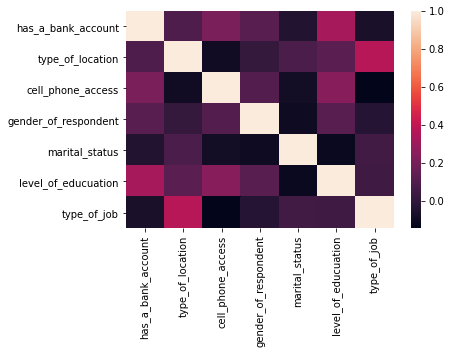

In [ ]:
hsizeage = fd1[['has_a_bank_account', 'type_of_location',
       'cell_phone_access', 
       'gender_of_respondent','marital_status',
       'level_of_educuation', 'type_of_job']]
sns.heatmap(hsizeage.corr(),annot=False)
plt.show()

# **8. Implementing the Solution**

##The findings

In [ ]:
fd1.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'marital_status', 'level_of_educuation',
       'type_of_job'],
      dtype='object')

The data was skewed in the following ways:
1. Majority of the data was collected in Rwanda
2. Majority of the data was collected in Rural areas
3. Majority of those who were interviewed were women
4. Majority of those interviewed do not have bank accounts
5. Majority of the population have mobile phones
6. The size of households seem to be very big
7. Respondent age was upto 83 years. There were several outliers of people older than that
8. Most of the population that participated is married. followed closely by single/never married
9. Most of the population has atleast primary school education
10. Most of the population is involved in farming followed closely by self employment.



##The Co - relations

The strongest co-relations are

1. Type of location and job
2. Access to banking and level of education
3. Access to banking and cellphone access
4. Cellphone access to level of education


The weakest co-relations are
1. Access to banking and the type of job
2. Access to banking and marital status
3. Type of Location and cell-phone access
4. Cellphone access and type of job
5. Cellphone access and marital status
6. Gender of respondent and marital status
7. Marital status and level of education
8. Gender of respondent and type of job

##The Recomendations

1. Banks should leverage on the high penetration of mobile phones across the region to increase the banked population
2. Education and knowledge about money and banking should be increased. Possibly in the primary school curriculum - This is the common place to reach most of the population
3. Farmers, self employed people and people in the informal sector should also be targeted by future marketing campaigns
4. There is a great potential for growth of the formal banking sector
5. Interestingly, the uptake of formal banking is equal both in rural and urban areas despite more of the skew being towards the rural population. Shows that marketing campaigns should focus their attention to the rural population.

#**9. Challenging the solution**

1. Due to the data skews stated above, the data may not be an accurate representation of the real world



#**10. Follow up questions**

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Yes we did. However not the best standards

1. the data was skewed.
2. If more parameters were captured we would be able to see more demographic influencers to banking in the region


### b). Do we need other data to answer our question?

No, but for a more descriptive analysis information in the list below should've been included:
1. Population - to find out whether the age or gender distribution are an accurate representation
2. Defined criteria of what the different careers involved and how they were put in bins
3. Age -do we need information on banking access of 80+ year old people? - i believe there shouf be a cut off
4. Household - Who constitutes of a house hold? Is it possible that one household was interviewed more than once - with different members participating



### c). Did we have the right question?

Yes, The data was able to display the correlation of different demographic and socio - economic factors to the access of formal banking and how the banks can be able to leverage this and increase the percentage of population that is formally banked. 

However,

The data had alot of information that I was able to gather. For example:

1. There doesn't seem to be any gender disparities. Both Men and women have the same careers and the same levels of education.